In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
# http://www.kobis.or.kr
mov = pd.read_csv('KOBIS_개봉일람_2019-10-26.csv', skiprows=5)

In [261]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [262]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      19704 non-null  float64
 1   영화명     19704 non-null  object 
 2   감독      19150 non-null  object 
 3   제작사     7966 non-null   object 
 4   수입사     13401 non-null  object 
 5   배급사     14244 non-null  object 
 6   개봉일     19686 non-null  object 
 7   영화유형    19704 non-null  object 
 8   영화형태    19690 non-null  object 
 9   국적      19695 non-null  object 
 10  전국      19705 non-null  object 
 11  전국.1    19478 non-null  object 
 12  전국.2    19705 non-null  object 
 13  서울      19472 non-null  object 
 14  서울.1    19705 non-null  object 
 15  장르      19603 non-null  object 
 16  등급      19654 non-null  object 
 17  영화구분    19704 non-null  object 
dtypes: float64(1), object(17)
memory usage: 2.7+ MB


In [263]:
mov.rename(columns = {'전국':'스크린수','전국.1':'매출액','전국.2':'관객수','서울':'서울매출액','서울.1':'서울관객수'}, inplace=True)

In [264]:
mov.drop(0, inplace=True)

In [265]:
mov.drop(['제작사', '서울매출액', '서울관객수', '순번', '영화유형', '등급' , '수입사', '배급사'] ,axis=1, inplace = True)

In [266]:
mov.head(3)

,영화명,감독,개봉일,영화형태,국적,스크린수,매출액,관객수,장르,영화구분
1,명량,김한민,2014-07-30,장편,한국,"1,587","135,748,398,910","17,613,682",사극,일반영화
2,극한직업,이병헌,2019-01-23,장편,한국,"1,978","139,647,979,516","16,264,944",코미디,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,장편,한국,"1,912","115,698,654,137","14,410,754",판타지,일반영화


In [267]:
# 칼럼별 null값의 갯수 확인
mov.isnull().sum()

영화명       0
감독      554
개봉일      18
영화형태     14
국적        9
스크린수      0
매출액     227
관객수       0
장르      101
영화구분      0
dtype: int64

In [268]:
mov.head(2)

,영화명,감독,개봉일,영화형태,국적,스크린수,매출액,관객수,장르,영화구분
1,명량,김한민,2014-07-30,장편,한국,"1,587","135,748,398,910","17,613,682",사극,일반영화
2,극한직업,이병헌,2019-01-23,장편,한국,"1,978","139,647,979,516","16,264,944",코미디,일반영화


In [269]:
mov.fillna(0, inplace=True)

In [270]:
# int(mov['매출액'].values[0].replace(',',''))

In [271]:
mov['스크린수']=mov['스크린수'].apply(lambda x : int(str(x).replace(',','')))
mov['매출액']=mov['매출액'].apply(lambda x : int(str(x).replace(',','')))
mov['관객수']=mov['관객수'].apply(lambda x : int(str(x).replace(',','')))

In [272]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19704 entries, 1 to 19704
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     19704 non-null  object
 1   감독      19704 non-null  object
 2   개봉일     19704 non-null  object
 3   영화형태    19704 non-null  object
 4   국적      19704 non-null  object
 5   스크린수    19704 non-null  int64 
 6   매출액     19704 non-null  int64 
 7   관객수     19704 non-null  int64 
 8   장르      19704 non-null  object
 9   영화구분    19704 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.7+ MB


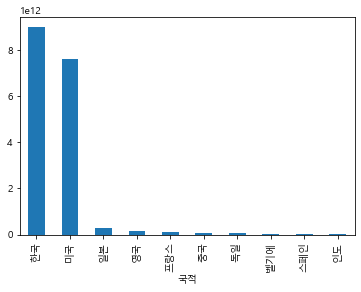

In [273]:
# 국적별 영화 매출액 합계 상위 10개국.. Bar Chart
mov.groupby('국적')['매출액'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

In [274]:
mov.head(3)

,영화명,감독,개봉일,영화형태,국적,스크린수,매출액,관객수,장르,영화구분
1,명량,김한민,2014-07-30,장편,한국,1587,135748398910,17613682,사극,일반영화
2,극한직업,이병헌,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,일반영화


<Figure size 360x216 with 0 Axes>

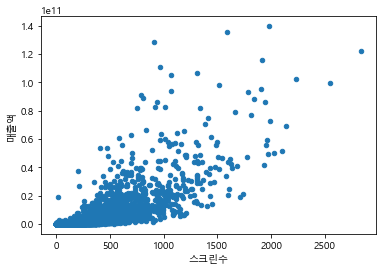

In [275]:
# 스크린수와 매출액의 관계를 분포그래프로 표시 그리고 회귀직선을 나타내시오
plt.figure(figsize=(5,3))
mov.plot(kind='scatter', x='스크린수', y='매출액')
# seaborn에 회귀직선 있음 sns.

In [276]:
# 역대 관객수가 최대인 영화는 무엇인가?
mov.loc[mov['관객수']==mov['관객수'].max()]['영화명']

1    명량
Name: 영화명, dtype: object

In [277]:
mov.head(3)

,영화명,감독,개봉일,영화형태,국적,스크린수,매출액,관객수,장르,영화구분
1,명량,김한민,2014-07-30,장편,한국,1587,135748398910,17613682,사극,일반영화
2,극한직업,이병헌,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,일반영화


In [278]:
# 스크린수 대비 매출액이 최대인 영화는 무엇인가?
mov['대비']=mov['매출액']/mov['스크린수']
mov[mov['스크린수'] !=0].sort_values('대비', ascending=False)[:1]

,영화명,감독,개봉일,영화형태,국적,스크린수,매출액,관객수,장르,영화구분,대비
258,워낭소리,이충렬,2009-01-15,장편,한국,20,19259975032,2962897,다큐멘터리,독립/예술영화,962998751.6


In [279]:
mov['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', 'SF', '어드벤처', '전쟁', '애니메이션', '범죄',
       '미스터리', '서부극(웨스턴)', '멜로/로맨스', '스릴러', '다큐멘터리', '공포(호러)', '가족',
       '뮤지컬', '공연', '기타', '성인물(에로)', 0], dtype=object)

In [280]:
# 평균매출이 가장 높은 장르는 무엇인가?
mov['평균매출액']=mov['매출액']/mov['관객수']
mov.loc[mov['평균매출액']==mov['평균매출액'].max()]['장르']

7981    공연
Name: 장르, dtype: object

In [281]:
# 연도별 개봉영화수 추이를 line chart로 표시하시오.

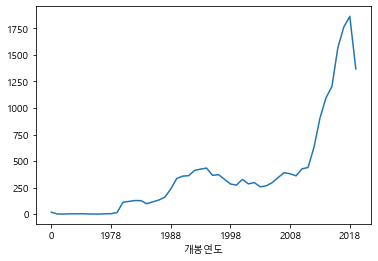

In [282]:
mov['개봉연도'] = mov['개봉일'].apply(lambda x : str(x).split('-')[0])
mov.groupby('개봉연도')['영화명'].count().plot(kind='line')

In [283]:
# 12개월 중 영화 개봉수가 가장 많은 달과 적은 달을 표시하시오.
mov.head(3)
mov['개봉월'] = mov['개봉일'].apply(lambda x : str(x)[5:7])
mov['개봉월'].value_counts()

11    1796
09    1774
08    1731
07    1707
12    1707
04    1686
05    1630
03    1623
06    1622
10    1547
01    1462
02    1401
        18
Name: 개봉월, dtype: int64

In [284]:
mov['개봉월'].value_counts().head(1)

11    1796
Name: 개봉월, dtype: int64

In [285]:
mov['개봉월'].value_counts().tail(2)

02    1401
        18
Name: 개봉월, dtype: int64

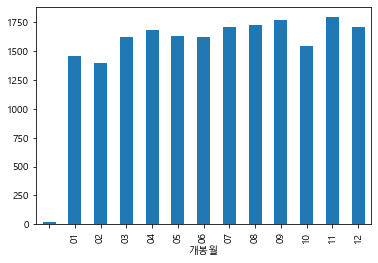

In [288]:
mov.groupby('개봉월')['국적'].count().plot(kind='bar')

In [256]:
# 역대 평균 관객수가 가장 많은 감독은 누구인가?
mov.groupby('감독')['관객수'].mean().sort_values()[-1:]

감독
크리스 벅,제니퍼 리    10296101.0
Name: 관객수, dtype: float64